CEE Final Project

## SVM

Full Match

In [4]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split

In [5]:
data_silver=pd.read_csv("Data_silver.csv")
data_gold=pd.read_csv("Data_gold.csv")
data_plat=pd.read_csv("Data_Plat.csv")
data_diamond=pd.read_csv("Data_diamond.csv")

In [6]:
data=data_silver.append([data_gold,data_plat,data_diamond])
X=np.array(data.values[:,7:],'double')
Y=np.array(data.values[:,1],'double')

In [7]:
where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

Y[Y==100]=1
Y[Y==200]=0

In [8]:
XX, X_TEST, YY, Y_TEST = train_test_split(X, Y, test_size=0.1, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX)
XX_scaled=X_scaler.transform(XX)   
X_TEST_scaled=X_scaler.transform(X_TEST)

In [10]:
from sklearn.svm import SVC
# for SVM, we need to figure out gamma and C we need to use, 
# as well as the number of features we want to use and k-fold cross validation as usual
# clf=SVC(kernel='rbf',gamma=2, C=1)

In [11]:
## seperator and the linear SVM separator
import matplotlib
import matplotlib.pyplot as plt

In [12]:
# import evaluation metrics
from sklearn.metrics import roc_curve, auc
# import the cross-validation structure
from sklearn.model_selection import StratifiedKFold, train_test_split

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

## SVM
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

k = range(1, 40) 
gammas=np.arange(0.1,4.1,0.1)
Cs=range(1,5)

for train_index, test_index in skf.split(XX_scaled,YY):
    X_train, X_test = XX_scaled[train_index], XX_scaled[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for i in k:
        # build the model
        feature_selector=SelectKBest(k=i)
        feature_selector.fit(X_train,y_train)
        X_train_subset=feature_selector.transform(X_train)
        X_test_subset=feature_selector.transform(X_test)
        training_auc_k = []
        test_auc_k = []
        for g in gammas:
            training_auc_gamma = []
            test_auc_gamma = []
            for c in Cs:
                ## fitting
                clf=SVC(kernel='rbf',gamma=g, C=c)
                clf.fit(X_train_subset,y_train)
                ## training
                dec_stat=clf.decision_function(X_train_subset)
                fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                training_auc_gamma.append(roc_auc)
                ## testing
                dec_stat=clf.decision_function(X_test_subset)
                fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                test_auc_gamma.append(roc_auc)
            training_auc_k.append(training_auc_gamma)
            test_auc_k.append(test_auc_gamma)
        training_auc_1.append(training_auc_k)
        test_auc_1.append(test_auc_k)
    cv_training_auc.append(training_auc_1)
    cv_test_auc.append(test_auc_1)

In [48]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)

In [49]:
avg_test_auc_n  ##6 features

array([ 0.98275362,  0.99007506,  0.99097843,  0.99239546,  0.99493888,
        0.99581861,  0.99542091,  0.99506496,  0.99460084,  0.99394181,
        0.99431695,  0.99357957,  0.99348245,  0.99307134,  0.99272535,
        0.99268354,  0.99208265,  0.9914403 ,  0.99106887,  0.98994175,
        0.98804845,  0.98534861,  0.98209536,  0.97769083,  0.97198058,
        0.96454917,  0.9579338 ,  0.95343556,  0.9441093 ,  0.9332054 ,
        0.91876604,  0.90542745,  0.89180672,  0.8799058 ,  0.86804263,
        0.8561413 ,  0.84627458,  0.83833696,  0.82865174])

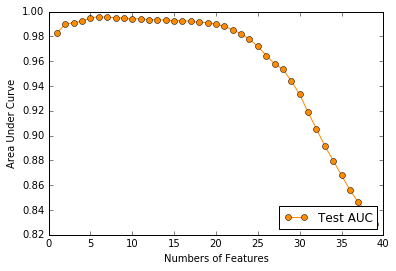

In [102]:
plt.plot(range(1,40),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=0)
avg_test_auc_n  ## C=2

array([ 0.95653089,  0.95782597,  0.95780875,  0.95779661])

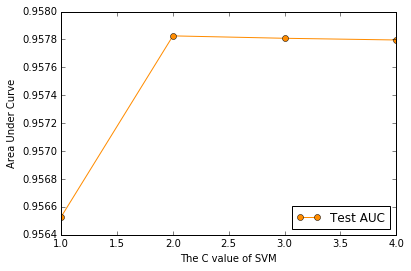

In [98]:
plt.plot(range(1,5),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The C value of SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=0)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)
avg_test_auc_n  ##gamma=0.1

array([ 0.99748098,  0.9964683 ,  0.99558247,  0.9948309 ,  0.99399819,
        0.99322863,  0.99254011,  0.99202126,  0.99155337,  0.99110078,
        0.99067346,  0.99015532,  0.98958379,  0.98876317,  0.98768   ,
        0.98630522,  0.98456463,  0.98236889,  0.97981421,  0.97652151,
        0.97282839,  0.96888962,  0.96446909,  0.95964793,  0.95437614,
        0.94903134,  0.943635  ,  0.93766077,  0.93186161,  0.9263261 ,
        0.92108639,  0.91591719,  0.91058272,  0.90555003,  0.90104841,
        0.89669176,  0.89234772,  0.88815699,  0.88409536,  0.88018441])

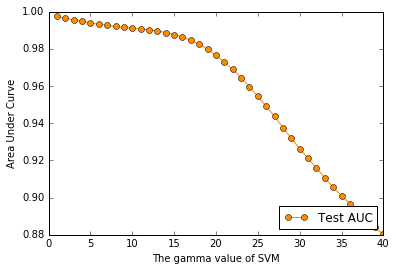

In [106]:
plt.plot(range(1,41),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The gamma value of SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

The cross-validation results show that gamma=0.1, C=2, and features k=6


In [37]:
feature_selector=SelectKBest(k=6)
feature_selector.fit(XX,YY)
XX_subset=feature_selector.transform(XX)
X_TEST_subset=feature_selector.transform(X_TEST)

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

In [44]:
## fitting
clf=SVC(kernel='rbf',gamma=0.1, C=2)
clf.fit(XX_subset,YY)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
## testing
dec_stat=clf.decision_function(X_TEST_subset)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [48]:
roc_auc

0.99614370468029012

First 10 minutes

In [49]:
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]

In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_10)
XX_scaled_10=X_scaler.transform(XX_10)   
X_TEST_scaled_10=X_scaler.transform(X_TEST_10)

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

## SVM
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

k = range(1, 40) 
gammas=np.arange(0.1,4.1,0.1)
Cs=range(1,5)

for train_index, test_index in skf.split(XX_scaled_10,YY):
    X_train, X_test = XX_scaled_10[train_index], XX_scaled_10[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for i in k:
        # build the model
        feature_selector=SelectKBest(k=i)
        feature_selector.fit(X_train,y_train)
        X_train_subset=feature_selector.transform(X_train)
        X_test_subset=feature_selector.transform(X_test)
        training_auc_k = []
        test_auc_k = []
        for g in gammas:
            training_auc_gamma = []
            test_auc_gamma = []
            for c in Cs:
                ## fitting
                clf=SVC(kernel='rbf',gamma=g, C=c)
                clf.fit(X_train_subset,y_train)
                ## training
                dec_stat=clf.decision_function(X_train_subset)
                fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                training_auc_gamma.append(roc_auc)
                ## testing
                dec_stat=clf.decision_function(X_test_subset)
                fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                test_auc_gamma.append(roc_auc)
            training_auc_k.append(training_auc_gamma)
            test_auc_k.append(test_auc_gamma)
        training_auc_1.append(training_auc_k)
        test_auc_1.append(test_auc_k)
    cv_training_auc.append(training_auc_1)
    cv_test_auc.append(test_auc_1)

In [52]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)

In [53]:
avg_test_auc_n  ##3 features

array([ 0.64740696,  0.69987184,  0.71649593,  0.69619577,  0.69780344,
        0.68934207,  0.69094083,  0.68766378,  0.68380193,  0.68489311,
        0.68358798,  0.68140088,  0.67306024,  0.67647763,  0.67250945,
        0.66757965,  0.66446033,  0.66472696,  0.67234893,  0.66031813,
        0.65414712,  0.66055367,  0.65695493,  0.65351413])

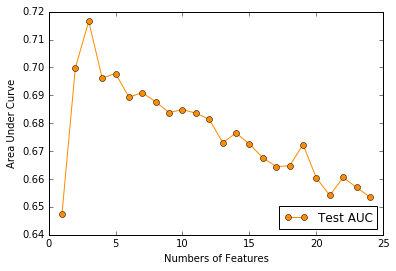

In [113]:
plt.plot(range(1,25),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=0)
avg_test_auc_n  ## C=1

array([ 0.68288166,  0.67649457,  0.67405239,  0.67258067])

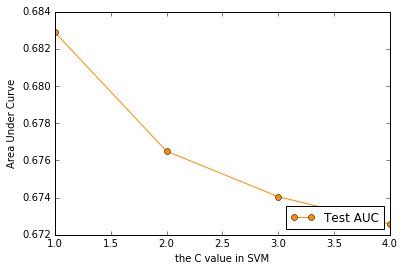

In [111]:
plt.plot(range(1,5),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('the C value in SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=0)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)
avg_test_auc_n  ##gamma=0.1

array([ 0.73211107,  0.7241444 ,  0.71868746,  0.71301541,  0.70743808,
        0.70222817,  0.6974867 ,  0.69311812,  0.68921345,  0.68593546,
        0.68316915,  0.68086464,  0.67878882,  0.67685547,  0.67540579,
        0.67411841,  0.67285816,  0.67168922,  0.67074942,  0.6697645 ,
        0.66870227,  0.66773379,  0.66695332,  0.66610938,  0.66544803,
        0.66468621,  0.66394241,  0.66330442,  0.66280958,  0.66226894,
        0.66153286,  0.66099219,  0.66048791,  0.65999289,  0.65930604,
        0.65880463,  0.65828993,  0.65772856,  0.65701342,  0.65634418])

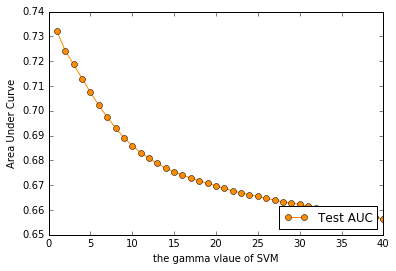

In [116]:
plt.plot(range(1,41),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('the gamma vlaue of SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

The cross-validation results show that gamma=0.1, C=1, and features k=3

In [66]:
feature_selector=SelectKBest(k=3)
feature_selector.fit(XX_10,YY)
XX_subset_10=feature_selector.transform(XX_10)
X_TEST_subset_10=feature_selector.transform(X_TEST_10)

In [67]:
## fitting
clf=SVC(kernel='rbf',gamma=0.1, C=1)
clf.fit(XX_subset_10,YY)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
## testing
dec_stat=clf.decision_function(X_TEST_subset_10)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [71]:
roc_auc

0.63328938694792347

Pre-Match Data

In [74]:
XX_prematch=XX[:,58:63]
X_TEST_prematch=X_TEST[:,58:63]

In [75]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_prematch)
XX_scaled_prematch=X_scaler.transform(XX_prematch)   
X_TEST_scaled=X_scaler.transform(X_TEST_prematch)

In [76]:
from sklearn.svm import SVC
# for SVM, we need to figure out gamma and C we need to use, 
# as well as the number of features we want to use and k-fold cross validation as usual
# clf=SVC(kernel='rbf',gamma=2, C=1)

In [85]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)
avg_test_auc_n 

array([ 0.5179392 ,  0.53429451,  0.55988711,  0.57295258,  0.56635567])

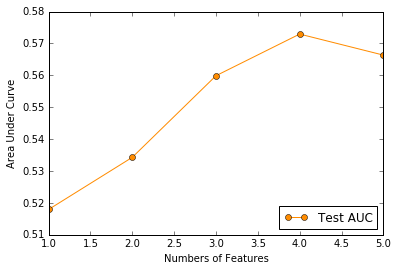

In [119]:
plt.plot(range(1,6),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()  ##4 features

In [83]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=0)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=1)
avg_test_auc_n  ##gamma=0.2

array([ 0.55044622,  0.55366404,  0.55177157,  0.55227266,  0.55339791,
        0.55142708,  0.55125786,  0.55177926,  0.55202293,  0.55154471,
        0.54944219,  0.55024491,  0.5494987 ,  0.54889721,  0.54962413,
        0.54804763,  0.54758335,  0.54817305,  0.54805183,  0.54656907])

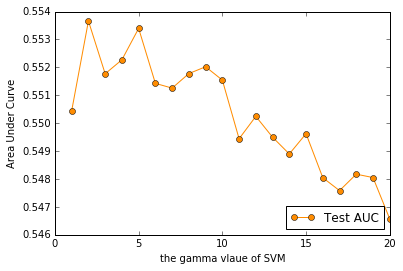

In [121]:
plt.plot(range(1,21),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker="o")
plt.xlabel('the gamma vlaue of SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_k=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_k,axis=0)
avg_test_auc_n  ## C=1

array([ 0.55391065,  0.55047344,  0.54902655,  0.54773261])

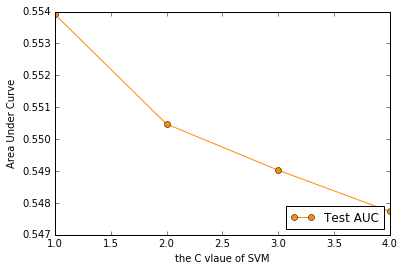

In [123]:
plt.plot(range(1,5),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('the C vlaue of SVM')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


The cross-validation results show that gamma=0.2, C=1, and features k=4

In [91]:
feature_selector=SelectKBest(k=4)
feature_selector.fit(XX_prematch,YY)
XX_subset_prematch=feature_selector.transform(XX_prematch)
X_TEST_subset_prematch=feature_selector.transform(X_TEST_prematch)

## fitting
clf=SVC(kernel='rbf',gamma=0.2, C=1)
clf.fit(XX_subset_prematch,YY)

## testing
dec_stat=clf.decision_function(X_TEST_subset_prematch)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

roc_auc

0.55436717205009889

In [ ]:
!pip install xgboost

